### Fastest Route

Consideramos ahora que los ejes tienen pesos y entonces ya no queremos el camino mas corto sino el camino que en total suma menos pesos.  <br> 

Lema: Todo subpath de un path optimo es tambien optimo. <br>
Corolario: si S -> ... -> u ->v es el camino mas corto hasta v, entonces d(S,v) = d(S,u) + w(u,v). 
Con w(u,v) el peso del eje que va de u a v <br> <br>

##### Relajacion de eje. 
El numero dist[v] sera una cota superior para la verdadera distancia de S a v. La relajacion de ejes va viendo todos los ejes que llegan hasta v desde un u y ve si pasar por dicho vertice u hubierta sido mejor. 
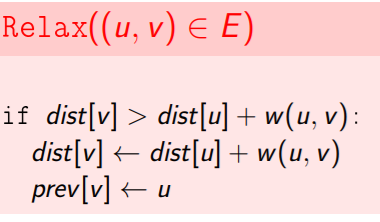

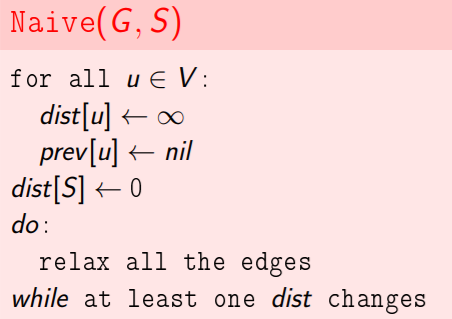

El algoritmo naive es malo pero funciona. 

# Algoritmo de Dijkstra

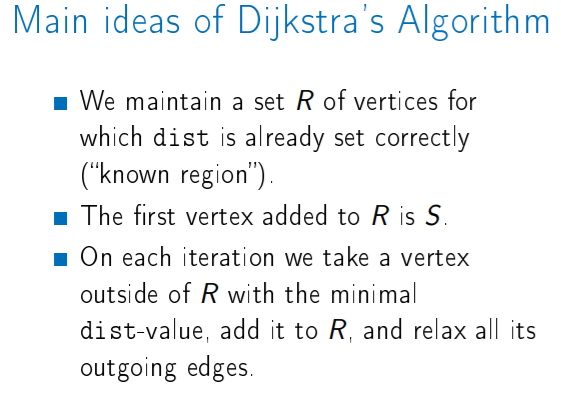

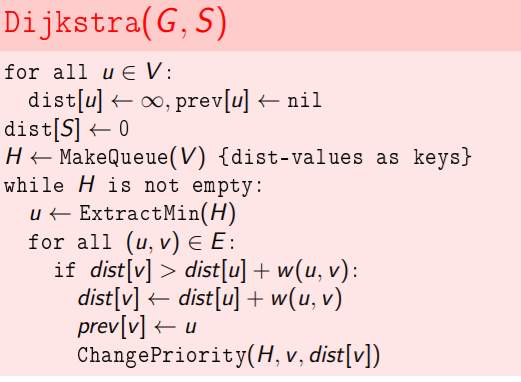

Tiempo: O((|V|+|E|)log|V|)

# 1. Minimo costo de viaje
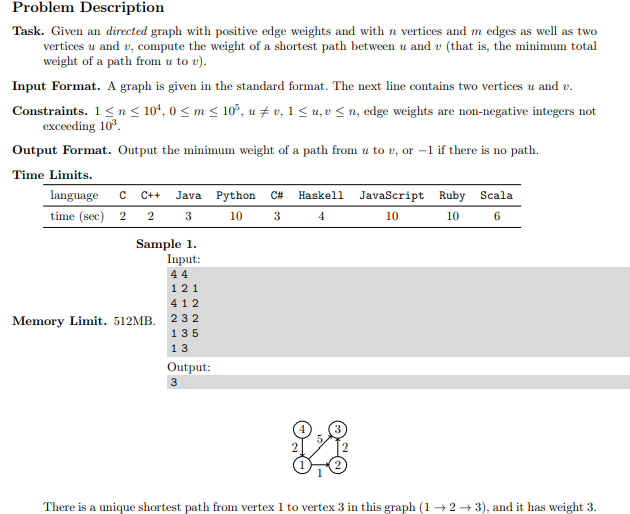

In [2]:
'''Mi solucion'''
import numpy as np
from math import *
import sys, threading
sys.setrecursionlimit(10**9) # max depth of recursion
threading.stack_size(2**27) 
import queue

#definimos la clase de nodos
class nodos:
    #cada nodo tiene sus conexiones y tiene una distancia inicializada en infinito
    def __init__(self, ind, conex):
        self.conex = conex
        self.ind = ind
        self.dist = inf

    #El m\'etodo lt define cual sera la funcion less than al comparar
    #dos objetos de la clasr (para que al usar funciones como min, max,
    #sort, el programa sepa que criterio de less than usar.
    #dice que un nodo es menot que otro si la distancia dist es menor

    def __lt__(self, other):
        return self.dist < other.dist

#el algoritmo va a encontrar la distancia desde principio hasta fin, dados los vertices 
#y una lista con los costos de cada eje
def distancia(vertices, costos, princ, fin):
    # el primer vertice tiene una distancia 0
    vertices[princ].dist = 0

    #creamos una priorityQueue, que es beuna para sacar minimos de una lista
    pq = queue.PriorityQueue()
    #ponemos el nodos desde el que empezamos
    pq.put(vertices[princ])

    #mientras haya un elemento en el queue
    while not pq.empty():
        #sacamos el elemento minimo (el de menor distancia)
        # que es el que sabemos que su distancia ya est'a fija seg'un el algoritmo.
        u = pq.get()

        # vamos a ir recorriendo las conexiones de u
        for i in range(len(u.conex)):
            #para cada conexion
            v = u.conex[i]
            
            #si la distancia actual que tiene el nodo v es mayor que la distancia que 
            #tendria si pasamos por u y le sumamos el costo de ir desde u hasta v,
            if vertices[v].dist > u.dist + costos[u.ind][i]:
                #entonces, relajamos la distancia de v
                vertices[v].dist = u.dist + costos[u.ind][i]
                # y ponemos este vertice en el queue para revistalo despues
                pq.put(vertices[v])
                
    #luego, si no hemos llegado a fin, imprimimos -1 indicando que no se puede
    if vertices[fin].dist == inf:
        return -1
    #sino, regresamos su dist
    return vertices[fin].dist



def main():
    

    print(distancia(vertices,costos, princ, fin))




# tomamos los numeros n y m del input
n , m = [int(x) for x in input().split()]

#definimos una matriz de costos, que va a tener el costo de ir desde un vertice v a cualqueira de 
#sus conexiones.
#para cualquier vertice v, le definimos un array y por cada conexion que sale de v, le agregaremos
# a este array el costo de esa flecha. El array solo tendr'a los costos de los caminos posibles que 
#salen de v, no tiene espacios vacios para los elementos a los que v no tiene conexiones. 
# por ello, hay probelmas con los indicies y por eso en el algoritmo usamos i en el for loop
costos = [[] for _ in range(n)]

#definimos el array de los nodos con conexiones por ahora vacias
vertices = [nodos(i,[]) for i in range(n)]

#para cada entrada de los ejes
for i in range(m):
    
    p , q , c = [int(x) for x in input().split()]
    #creamos una conexion de p a q
    vertices[p-1].conex.append(q-1)
    
    #agregamos el Costo de ir de p-1 a q-1 a la matriz de costos en el array de los que salen de p-1
    costos[p-1].append(c)

#tomamos el princ y fin 
princ , fin = [int(x) for x in input().split()]
princ = princ -1
fin = fin-1

threading.Thread(target=main).start()

4 4
1 2 1
4 1 2
2 3 2
1 3 5
1 3
3


Libreria ya implementada

In [35]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra

''' Tenemos que darle una matriz con todas las conexiones y los pesos de cada una'''
''' por ejemplo, ahora esta con los pesos de lo de arriba (pero con indices 0 -indexados)'''
graph = [
[0, 1, 5, 0],
[0, 0, 2, 0],
[0, 0, 0, 0],
[2, 0, 0, 0]
]
graph = csr_matrix(graph)
print(graph)

''' El dijstra regresa una matriz con todas las distancias entre nodos'''
''' Y regresa un array de predecesores'''


dist_matrix, predecessors = dijkstra(csgraph=graph, indices=0, return_predecessors=True)
#lo de indices es para que calcule solo las distancias saliendo del indice 0, o podemos ponet mas.

#la dist matriz da las distancias desde cualquier indice a cualquier otro. Como escogimos empezar 
#en 0, solo da las distancias saliendo del 0avo nodo. 
print(dist_matrix)

#predecessors da de donde viene el camino que lleva de indices a cada uno de estos puntos. 
print(predecessors)

  (0, 1)	1
  (0, 2)	5
  (1, 2)	2
  (3, 0)	2
[ 0.  1.  3. inf]
[-9999     0     1 -9999]


In [36]:
''' Implementacion del codigo de arriba para el input de los problemas del libro'''
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra
import numpy

n , m = [int(x) for x in input().split()]

graph = np.zeros((n,n))
for i in range(m):
    p , q , c = [int(x) for x in input().split()]
    graph[p-1,q-1] = c
graph = csr_matrix(graph)
print(graph)

princ , fin = [int(x) for x in input().split()]
princ = princ -1
fin = fin-1
dist_matrix, predecessors = dijkstra(csgraph=graph, indices=0, return_predecessors=True)

print(dist_matrix)

print(predecessors)
print(dist_matrix[fin])



ValueError: not enough values to unpack (expected 2, got 0)

In [37]:
'''Otro codigo con lista de adjudicaciones'''


# Python program for Dijkstra's single
# source shortest path algorithm. The program is
# for adjacency matrix representation of the graph
 
# Library for INT_MAX
import sys
 
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    def printSolution(self, dist):
        print("Vertex tDistance from Source")
        for node in range(self.V):
            print(node, "t", dist[node])
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):
 
        # Initilaize minimum distance for next node
        min = sys.maxsize
 
        # Search not nearest vertex not in the
        # shortest path tree
        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
 
        return min_index
 
    # Funtion that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):
 
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minDistance(dist, sptSet)
 
            # Put the minimum distance vertex in the
            # shotest path tree
            sptSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shotest path tree
            for v in range(self.V):
                if self.graph[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + self.graph[u][v]:
                    dist[v] = dist[u] + self.graph[u][v]
 
        self.printSolution(dist)
 
 
# Driver program
g = Graph(9)
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
           [4, 0, 8, 0, 0, 0, 0, 11, 0],
           [0, 8, 0, 7, 0, 4, 0, 0, 2],
           [0, 0, 7, 0, 9, 14, 0, 0, 0],
           [0, 0, 0, 9, 0, 10, 0, 0, 0],
           [0, 0, 4, 14, 10, 0, 2, 0, 0],
           [0, 0, 0, 0, 0, 2, 0, 1, 6],
           [8, 11, 0, 0, 0, 0, 1, 0, 7],
           [0, 0, 2, 0, 0, 0, 6, 7, 0]
           ]
 
g.dijkstra(0)

Vertex tDistance from Source
0 t 0
1 t 4
2 t 12
3 t 19
4 t 21
5 t 11
6 t 9
7 t 8
8 t 14


# Solucion Algo Mejor
mantiene dist fuera de los atributos de los nodos, como un array a parte. En este caso, eso no genera ninguna ventaja, pero si queremos reusar este grafo para calcular otra distancia, no hace falta resetear el .dist de cada nodo, sino simplemente resetear el array dist. 

In [3]:
import numpy as np
from math import *
import queue

#definimos la clase de nodos. 
class nodos:
    #cada nodo tiene sus conexiones y su indice.
    def __init__(self, ind, conex):
        self.conex = conex
        self.ind = ind
        
    #definimos la funcion de <. Un nodo es menor a otro si la distancia hasta el nodo es menor
    # para ello, necesitamos el array de distancias. 
    def __lt__(self, other):
        return(dist[self.ind] < dist[other.ind])



#el algoritmo va a encontrar la distancia desde principio hasta fin, dados los vertices 

def distancia(vertices,n, princ,fin):
    
    # la distancia hasta el nodo principio es 0 y ya est'a visitado
    #ademas, es su propio prev. (le ponemos el +1 para que el prev guarde los indices idexados en 1
    # en vez de 0)
    
    # definimos el array de dist y de prev y de vis
    # el marcador de visitado se prende tan pronto como se ponga un nodo en el queue
    #. El de dist tiene la distancia desde princ hasta cualquier
    #nodo, por ahora inicializados a inf
    #el de prev tiene el nodo anterior en el camino, ahora inicializados a None
    global dist
    dist = n*[np.inf]
    global vis
    vis = n*[0]
    global prev
    prev = n*[None]
    
    dist[princ] = 0
    vis[princ] = 1
    prev[princ] = princ+1


    
    #creamos una priorityQueue, que es beuna para sacar minimos de una lista
    pq = queue.PriorityQueue()
    #ponemos el nodos desde el que empezamos en el queue
    pq.put(vertices[princ])
    

    #mientras haya un elemento en el queue
    while not pq.empty():
        #sacamos el elemento minimo del queue (el de menor distancia, segun en < que definimos)
        # que es el que sabemos que su distancia ya est'a segura y no puede disminuir m'as, 
        #de este nodo ya sabemos su distancia final y no tenemos s'olo aproximaciones. 
        u = pq.get()

        
        #si ya legamos a fin, sabemos que su distancia ya es la buena, asi que paramos aqu'i
        ''' quitar este if si se desea recorrer todo el grafo.'''
        if u.ind == fin:
            return(dist[u.ind])
        
        
        
        # vamos a ir recorriendo las conexiones de u
        for i in range(len(u.conex)):
            #para cada nodo en la conexion:. v va a ser el indice de la conexion.
            v = u.conex[i][0]
         
            
            #si la distancia actual que tiene el nodo v es mayor que la distancia que 
            #tendria si pasamos por u y le sumamos el costo de ir desde u hasta v, que est'a guardado
            #en u.conex
            if dist[v] > dist[u.ind] + u.conex[i][1]:
                #entonces, relajamos la distancia de v
                dist[v] = dist[u.ind] + u.conex[i][1]
                
                # Si este vertice no ha sido revisado, lo ponemos en la queue y lo marcamos como 
                # visitado (o mas bien, esperando visitacion)
                if vis[v] ==0:
                    pq.put(vertices[v])
                    vis[v] =1
                
                #actualizamos el posible valor de prev[u], que por ahora es solo una especulacion.
                # pero al terminar, la ultima especulacion dada para v ser'a la buena.
                prev[v] = u.ind
         
    
    
    #luego, si no hemos llegado a fin, imprimimos -1 indicando que no se puede
    if dist[fin] == inf:
        return -1
    #sino, regresamos su dist, que ya es definitiva (creo que esta parte nunca se va a activar,
    #porque deber'ia de activarse antes la del if de arriba)
    return (dist[fin])




def main(vertices,n,princ,fin):
    return(distancia(vertices,n, princ, fin))


# tomamos los numeros n y m del input
n , m = [int(x) for x in input().split()]


#definimos el array de los nodos con conexiones por ahora vacias
vertices = [nodos(i,[]) for i in range(n)]



#para cada entrada de los ejes
for i in range(m):
    #le agregamos la conexion que va de p-1 hasta q-1 y que tiene costo c
    p , q , c = [int(x) for x in input().split()]
    #creamos una conexion de p a q
    vertices[p-1].conex.append([q-1,c])
    

#tomamos el princ y fin 
princ , fin = [int(x)-1 for x in input().split()]



print("la distancia entre los nodos es", main(vertices,n,princ,fin))




def camino(prev,princ,fin):
    path=[]
    
    ultimo=  fin
    while ultimo != princ:
        path.append(ultimo+1)
        ultimo= prev[ultimo]
    path.append(princ+1)
    
    path.reverse()
    
    return(path)

print('el camino seguido es:', camino(prev,princ,fin))


4 4
1 2 1
4 1 2
2 3 2
1 3 5
4 3
la distancia entre los nodos es 5
el camino seguido es: [4, 1, 2, 3]
